In [28]:
# Importing Dependencies
import pandas as pd
import requests
from bs4 import BeautifulSoup
import Links as ls

In [29]:
# Importing Batting URLs
# print(ls.Team_Batting_2007_url)

https://www.baseball-reference.com/teams/COL/2007.shtml#team_batting


In [34]:
# url = ls.Team_Batting_2024_url
# response= requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')
# tb = soup.find("table",id='team_batting')
# df = pd.read_html(str(tb))[0]
# df.head(5)

C:\Users\cassy\AppData\Local\Temp\ipykernel_32544\2811556359.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tb))[0]


,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,1,C,Elias Díaz,33,65,259,240,21,71,14,...,.340,.417,.756,106,100,7,3,0,2,2
1,2,1B,Elehuris Montero,25,67,247,224,23,46,10,...,.267,.304,.571,56,68,7,0,0,3,0
2,3,2B,Brendan Rodgers,27,75,294,276,31,75,15,...,.313,.388,.701,91,107,7,0,0,1,1
3,4,SS,Ezequiel Tovar,22,91,401,377,43,100,25,...,.293,.438,.731,97,165,8,3,4,3,0
4,5,3B,Ryan McMahon*,29,91,392,347,48,95,20,...,.349,.452,.801,118,157,7,2,0,2,2


In [ ]:
# url = ls.Team_Batting_2007_url
# response= requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')
# tb = soup.find("table",id='team_batting')
# df = pd.read_html(str(tb))[0]
# df.head(21)


In [78]:
def get_batting_table(x,y):
    url = x
    response=requests.get(url)
    soup= BeautifulSoup(response.content, 'html.parser')
    tb = soup.find("table",id=y)
    df = pd.read_html(str(tb))[0]
    
    for col in df.columns:
        if col == "Pos":
            pass
        elif col == "Name":
            pass
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
   
    return df


In [81]:
batting_2007= get_batting_table(ls.Team_Batting_2007_url,"team_batting")
batting_2024=get_batting_table(ls.Team_Batting_2024_url,"team_batting")
# batting_2007.dtypes

C:\Users\cassy\AppData\Local\Temp\ipykernel_32544\2099050841.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tb))[0]
C:\Users\cassy\AppData\Local\Temp\ipykernel_32544\2099050841.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tb))[0]


<Axes: title={'center': 'Player v On Base Percentage'}, xlabel='Player', ylabel='On Base Percentage (OBP)'>

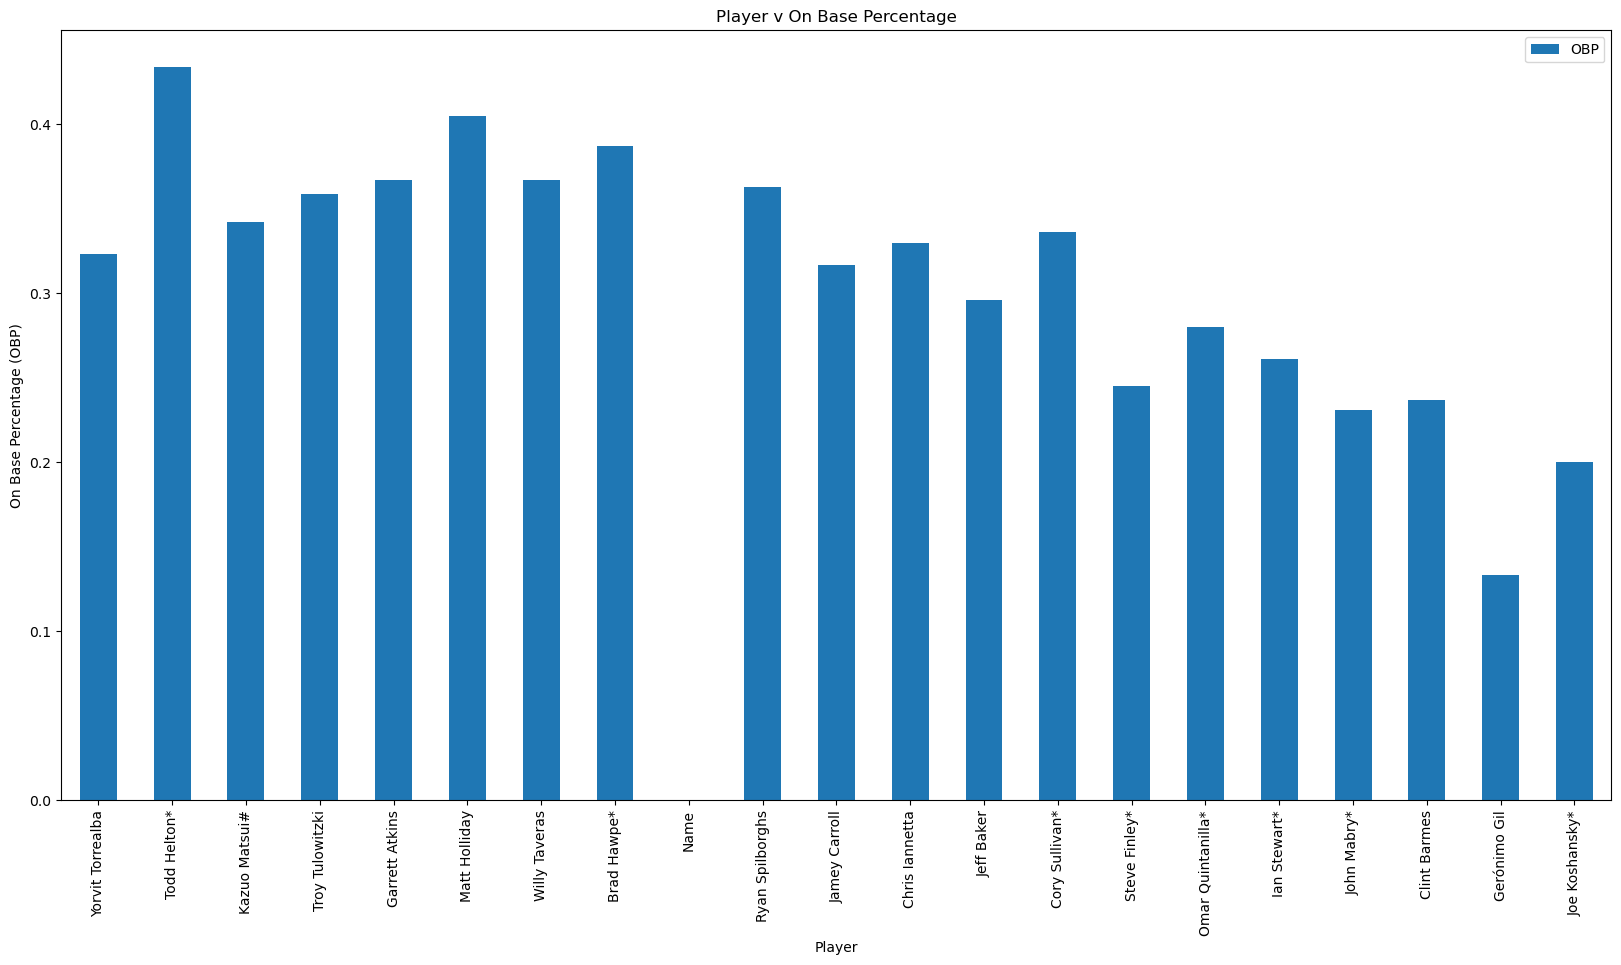

In [84]:
batting_2007=batting_2007.head(21)
batting_2007.plot(x="Name",
                  y="OBP",
                  kind="bar",
                  title="Player v On Base Percentage",
                  ylabel="On Base Percentage (OBP)",
                  xlabel="Player",
                  figsize= [20,10])